<a href="https://colab.research.google.com/github/prabhkaur301/ML-notebooks/blob/main/Random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


importing dataset

In [3]:
dataset=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/randomforest/IceCreamData.csv')
dataset.head(5)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


Splitting dataset as X and Y

In [4]:
X=dataset['Temperature'].values
Y=dataset['Revenue'].values

In [6]:
print(X)


[24.56688442 26.00519115 27.79055388 20.59533505 11.50349764 14.35251388
 13.70777988 30.83398474  0.97686999 31.66946458 11.45525338  3.66466958
 18.81182403 13.62450892 39.53990899 18.48314099 25.93537514 42.51528041
 29.58948056 21.77594799 25.45783637 15.21456942 22.61931574 16.25872074
 23.88172478 18.97830025 15.6614643  29.18504465 19.02461092 35.12015142
 24.18393726 15.23119012  8.79095281 18.23322784 35.62892497 37.05754246
 22.28455032 17.51707397 31.7379196  17.04973761 23.0034888   8.75555394
 18.77535808 14.10966102 18.63391286 15.67648661 20.94791347 30.6353071
 20.47359412 31.22898848  6.39383463 27.18581031 28.63373276 27.99922248
 10.32638937 27.31281141 33.23567229 36.56911506 12.46293731 14.37969698
 16.30255473 11.56964367 33.55141872  3.98652317 20.51163741  6.5425144
 19.81753939 11.69453767 21.4881766  18.77353222 12.68842965 27.88711086
 26.9567197  27.37540101 24.10161613 28.7901015  40.47398918 25.54596553
 28.70127646 29.4637861  16.02097541 14.73955066 22.1

In [7]:
print(Y)

[ 534.7990284   625.1901215   660.6322888   487.7069603   316.2401944
  367.9407438   308.8945179   696.7166402    55.39033824  737.8008241
  325.9684084    71.16015301  467.4467066   289.5409341   905.4776043
  469.9090332   648.2099977   921.508275    649.5611747   534.6228653
  612.1539491   353.3256334   524.2361154   374.231135    523.1245467
  473.6043349   402.4553204   679.3177906   517.5340283   809.6720534
  528.3804165   356.0980075   237.7639106   418.1372788   809.4634112
  870.7659159   550.2785159   405.6614459   740.9356848   501.7329901
  539.6880057   242.2362083   421.621505    358.0028493   467.631063
  396.9356482   500.9250645   651.8615363   451.4507843   697.8339862
  190.7109408   621.1897304   666.1368355   628.4532107   219.3039932
  623.5988607   749.3671543   827.6848313   303.7343815   351.2888691
  381.5641352   321.8482734   774.1080813   131.6570175   498.7570498
  195.7357217   496.0112948   284.7727889   483.4897686   430.3439033
  276.787086    627.2

splitting dataset as training and test data

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.05,random_state=0)

Training the model

In [9]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(n_estimators=10, random_state=0)

making prediction

In [10]:
y_pred = regressor.predict(X_test.reshape(-1,1))

In [11]:
df = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
df

,Real Values,Predicted Values
0,704.281439,688.601198
1,632.901914,632.671327
2,662.558990,650.692423
3,449.813300,460.020078
4,636.298374,645.415889
5,469.909033,429.772074
6,587.221246,575.534813
7,581.074005,641.100950
8,675.828916,657.167088
9,493.710333,468.326430


Visualising trained model

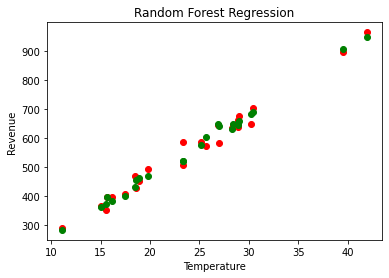

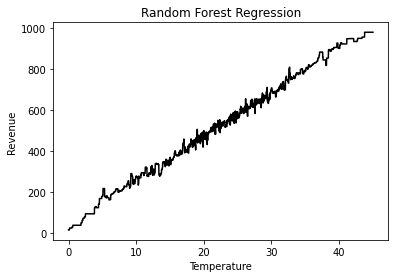

In [12]:
# # Visualising the Random Forest Regression Results  
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_test, y_pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

plt.plot(X_grid, regressor.predict(X_grid), color = 'black')
plt.title('Random Forest Regression')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()